In [55]:
import json
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import math
stopwords =  set(stopwords.words('english'))
import pandas as pd
#biased_m_f for m>0 and f>0
with open ('/beegfs/sb6416/ds1012/scores/dm/training_bs/bias_scores/biased_words_m_f') as f :
    dm_train = json.load(f)
    

with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs/bias_scores/biased_words_m_f') as f :
    dm_gen = json.load(f)   
    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_0pt01/bias_scores/biased_words_m_f') as f :
    dm_0pt01 = json.load(f)    

with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_0pt1/bias_scores/biased_words_m_f') as f :
    dm_0pt1 = json.load(f)    
    
    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_0pt4/bias_scores/biased_words_m_f') as f :
    dm_0pt4 = json.load(f)    
    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_1pt0/bias_scores/biased_words_m_f') as f :
    dm_1pt0 = json.load(f)

    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_5pt0/bias_scores/biased_words_m_f') as f :
    dm_5pt0 = json.load(f)

    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_10pt0/bias_scores/biased_words_m_f') as f :
    dm_10pt0 = json.load(f)   
    

In [56]:


U ={}
V={}
Z ={}
for x in dm_train:
    if x in dm_gen and x in dm_0pt01 and x in dm_0pt1 and x in dm_0pt4 and x in dm_1pt0 and x in dm_5pt0 and x in dm_10pt0 and x not in stopwords:
#         U[x] = { 'training' : abs(0.5 - dm_train[x]['b_score']) , 'generated_text' : abs (0.5 - dm_gen[x]['b_score']), 'l_0pt4' : abs (0.5 - dm_0pt4[x]['b_score']) ,'l_1pt0' : abs (0.5 - dm_1pt0[x]['b_score']), 'l_5pt0' : abs (0.5 - dm_5pt0[x]['b_score']), 'l_10pt0' : abs (0.5 - dm_10pt0[x]['b_score'])}
        #W[x] = { 'training' : dm_train[x]['b_score']) , 'generated_text' : abs (0.5 - dm_gen[x]['b_score']), 'l_0pt4' : abs (0.5 - dm_0pt4[x]['b_score']) ,'l_1pt0' : abs (0.5 - dm_1pt0[x]['b_score']), 'l_5pt0' : abs (0.5 - dm_5pt0[x]['b_score']), 'l_10pt0' : abs (0.5 - dm_10pt0[x]['b_score'])}
        
        V[x] = { 'training' :2*(0.5 - dm_train[x]['b_score']) , 'generated_text' : 2* (0.5 - dm_gen[x]['b_score']) ,'l_0pt01' : 2* (0.5 - dm_0pt01[x]['b_score']), 'l_0pt1' : 2* (0.5 - dm_0pt1[x]['b_score']),'l_0pt4' : 2* (0.5 - dm_0pt4[x]['b_score']) ,'l_1pt0' : 2* (0.5 - dm_1pt0[x]['b_score']), 'l_5pt0' : 2* (0.5 - dm_5pt0[x]['b_score']), 'l_10pt0' : 2* (0.5 - dm_10pt0[x]['b_score'])}
        Z[x] = { 'training' :(dm_train[x]['b_score']) , 'generated_text' :  ( dm_gen[x]['b_score']) ,'l_0pt01' :  (dm_0pt01[x]['b_score']), 'l_0pt1' :  (dm_0pt1[x]['b_score']),'l_0pt4' :  (dm_0pt4[x]['b_score']) ,'l_1pt0' :dm_1pt0[x]['b_score'], 'l_5pt0' :  dm_5pt0[x]['b_score'], 'l_10pt0' : ( dm_10pt0[x]['b_score'])}
        #print(x)
        
# M = pd.DataFrame.from_dict(U, orient='index')   
N = pd.DataFrame.from_dict(V, orient='index')   
L = pd.DataFrame.from_dict(Z, orient='index')  


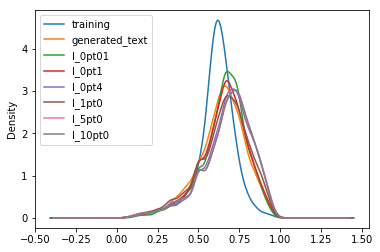

In [57]:


L.columns.name = ['training', 'generated text', 'l_0pt01', 'l_0pt1','l_0pt4', 'l_1pt0', 'l_10pt0', 'l_10pt0'] 
#plt = L.plot(columns=['Type A', 'Type B'], index=['Index 1','Index 2']))
L.training.plot.kde(legend = True, y = 'frequency')
L.generated_text.plot.kde(legend = True)
L.l_0pt01.plot.kde(legend = True)
L.l_0pt1.plot.kde(legend = True)
L.l_0pt4.plot.kde(legend = True)
L.l_1pt0.plot.kde(legend = True)
L.l_5pt0.plot.kde(legend = True)
L.l_10pt0.plot.kde(legend = True)

# print (L.training.mean())
# print (L.generated_text.mean())
# print (L.l_0pt01.mean())
# print (L.l_0pt1.mean())
# print (L.l_0pt4.mean())
# print (L.l_1pt0.mean())
# print(L.l_5pt0.mean())
# print (L.l_10pt0.mean())
# print (L.columns)

In [58]:
# M.columns.name = ['training', 'generated text',  'l_0pt01',  'l_0pt1', 'l_0pt4', 'l_1pt0', 'l_10pt0', 'l_10pt0'] 
# #plt = L.plot(columns=['Type A', 'Type B'], index=['Index 1','Index 2']))
# M.training.plot.kde(legend = True, y = 'frequency')
# M.generated_text.plot.kde(legend = True)
# M.l_0pt01.plot.kde(legend = True)
# M.l_0pt1.plot.kde(legend = True)
# M.l_0pt4.plot.kde(legend = True)
# M.l_1pt0.plot.kde(legend = True)
# M.l_5pt0.plot.kde(legend = True)
# M.l_10pt0.plot.kde(legend = True)



In [59]:
import numpy as np

Mean=[]
Median = []
Std_dev = []
Skew =[]
Kurtosis =[]
Lambda =np.array([0, 0, 0.01,0.1,0.4,1.0, 5.0, 10.0 ], dtype =float)
# 257,255.33, 258.46, 244.28,238.91, 238.91, 238.96
Perplexity = np.array([0, 257,255.33, 258.46, 244.28,238.91, 238.91, 238.96])
Row_names=['training', 'generated text', 'lambda_0pt01','lambda_0pt1','lambda_0pt4', 'lambda_1pt0', 'lambda_5pt0','lambda_10.0']
for column in N.columns:
    Mean.append(round(N[column].mean(),2))
    Median.append(round(N[column].median(),2))
                
    Std_dev.append(round(N[column].std(),2))
    Skew.append(round(N[column].skew(),2))
    Kurtosis.append(round(N[column].kurtosis(),2))


stats = pd.DataFrame(np.column_stack([Row_names,Lambda,Perplexity, Mean, Median, Std_dev, Skew, Kurtosis]), 
                               columns=['label', 'lambda','Perplexity','Mean', 'Median', 'Standard Deviation','Skew','Kurtosis'])


In [60]:
stats

,label,lambda,Perplexity,Mean,Median,Standard Deviation,Skew,Kurtosis
0,training,0.0,0.0,-0.22,-0.24,0.24,0.94,2.44
1,generated text,0.0,257.0,-0.28,-0.31,0.3,0.68,0.69
2,lambda_0pt01,0.01,255.33,-0.32,-0.33,0.28,0.8,1.08
3,lambda_0pt1,0.1,258.46,-0.3,-0.33,0.3,0.77,0.9
4,lambda_0pt4,0.4,244.28,-0.35,-0.39,0.31,0.89,1.02
5,lambda_1pt0,1.0,238.91,-0.3,-0.33,0.32,0.75,0.6
6,lambda_5pt0,5.0,238.91,-0.35,-0.4,0.31,0.92,0.97
7,lambda_10.0,10.0,238.96,-0.35,-0.4,0.31,0.92,0.97


In [63]:
import json
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopwords =  set(stopwords.words('english'))
import pandas as pd
#biased_m_f for m>0 and f>0
with open ('/beegfs/sb6416/ds1012/scores/dm/training_bs/bias_scores/biased_words_m_f') as f :
    dm_train = json.load(f)
    

with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs/bias_scores/biased_words_m_f') as f :
    dm_gen = json.load(f)   
    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_0pt01/bias_scores/biased_words_m_f') as f :
    dm_0pt01 = json.load(f)    

with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_0pt1/bias_scores/biased_words_m_f') as f :
    dm_0pt1 = json.load(f)    
    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_0pt4/bias_scores/biased_words_m_f') as f :
    dm_0pt4 = json.load(f)    
    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_1pt0/bias_scores/biased_words_m_f') as f :
    dm_1pt0 = json.load(f)
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_5pt0/bias_scores/biased_words_m_f') as f :
    dm_5pt0 = json.load(f)

    
with open ('/beegfs/sb6416/ds1012/scores/dm/finale/bs_10pt0/bias_scores/biased_words_m_f') as f :
    dm_10pt0 = json.load(f)   
    
U ={}
V={}
Z ={}
D={}
C={}
for x in dm_train:
    if x in dm_gen and x in dm_0pt01 and x in dm_0pt1 and x in dm_0pt4 and x in dm_1pt0 and x in dm_5pt0 and x in dm_10pt0 and x not in stopwords:
        #print(x )
#         U[x] = { 'training' : abs(0.5 - dm_train[x]['b_score']) , 'generated_text' : abs (0.5 - dm_gen[x]['b_score']), 'l_0pt4' : abs (0.5 - dm_0pt4[x]['b_score']) ,'l_1pt0' : abs (0.5 - dm_1pt0[x]['b_score']), 'l_5pt0' : abs (0.5 - dm_5pt0[x]['b_score']), 'l_10pt0' : abs (0.5 - dm_10pt0[x]['b_score'])}
        
#         V[x] = { 'training' :2*(0.5 - dm_train[x]['b_score']) , 'generated_text' : 2* (0.5 - dm_gen[x]['b_score']) ,'l_0pt4' : 2* (0.5 - dm_0pt4[x]['b_score']) ,'l_1pt0' : 2* (0.5 - dm_1pt0[x]['b_score']), 'l_5pt0' : 2* (0.5 - dm_5pt0[x]['b_score']), 'l_10pt0' : 2* (0.5 - dm_10pt0[x]['b_score'])}
        
#         Z[x] = { 'training' :(dm_train[x]['b_score']) , 'generated_text' :  ( dm_gen[x]['b_score']) ,'l_0pt4' :  (dm_0pt4[x]['b_score']) ,'l_1pt0' :dm_1pt0[x]['b_score'], 'l_5pt0' :  dm_5pt0[x]['b_score'], 'l_10pt0' : ( dm_10pt0[x]['b_score'])}
         D[x]=  { 'gen' :(dm_train[x]['b_score']) - ( dm_gen[x]['b_score']), 'l_0pt01' :(dm_train[x]['b_score']) - ( dm_0pt01[x]['b_score']),'l_0pt1' :(dm_train[x]['b_score']) - ( dm_0pt1[x]['b_score']),'l_0pt4' :(dm_train[x]['b_score']) - ( dm_0pt4[x]['b_score']),   'l_1pt0' :(dm_train[x]['b_score']) - ( dm_1pt0[x]['b_score']),  'l_5pt0' :(dm_train[x]['b_score']) - ( dm_5pt0[x]['b_score']), 'l_10pt0' :(dm_train[x]['b_score']) - ( dm_10pt0[x]['b_score']), }
         C[x]=  { 'gen' :abs(dm_train[x]['b_score'] -  dm_gen[x]['b_score']),'l_0pt01' :abs(dm_train[x]['b_score'] -  dm_0pt01[x]['b_score']),'l_0pt1' :abs(dm_train[x]['b_score'] -  dm_0pt1[x]['b_score']),'l_0pt4' :abs(dm_train[x]['b_score'] -  dm_0pt4[x]['b_score']),   'l_1pt0' :abs(dm_train[x]['b_score'] -  dm_1pt0[x]['b_score']),  'l_5pt0' :abs(dm_train[x]['b_score'] -  dm_5pt0[x]['b_score']), 'l_10pt0' :abs(dm_train[x]['b_score'] - dm_10pt0[x]['b_score']), }
        #print(x)
        
# M = pd.DataFrame.from_dict(U, orient='index')   
# N = pd.DataFrame.from_dict(V, orient='index')   
# L = pd.DataFrame.from_dict(Z, orient='index')  
X = pd.DataFrame.from_dict(D, orient='index')
Y = pd.DataFrame.from_dict(C, orient='index')


L.columns.name = ['training', 'generated text', 'l_0pt01', 'l_0pt1','l_0pt4', 'l_1pt0', 'l_10pt0', 'l_10pt0'] 


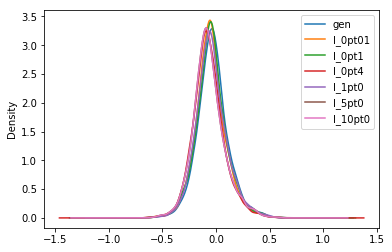

In [64]:
# X.training.plot.kde(legend = True, y = 'frequency')
X.gen.plot.kde(legend = True)
X.l_0pt01.plot.kde(legend = True)
X.l_0pt1.plot.kde(legend = True)
X.l_0pt4.plot.kde(legend = True)
X.l_1pt0.plot.kde(legend = True)
X.l_5pt0.plot.kde(legend = True)
X.l_10pt0.plot.kde(legend = True)

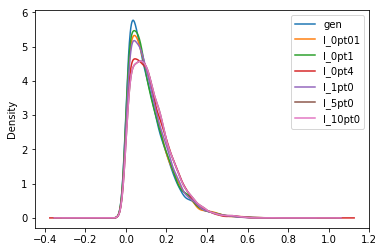

In [65]:
# X.training.plot.kde(legend = True, y = 'frequency')
Y.gen.plot.kde(legend = True)
Y.l_0pt01.plot.kde(legend = True)
Y.l_0pt1.plot.kde(legend = True)

Y.l_0pt4.plot.kde(legend = True)
Y.l_1pt0.plot.kde(legend = True)
Y.l_5pt0.plot.kde(legend = True)
Y.l_10pt0.plot.kde(legend = True)

In [75]:

Mean=[]
Median = []
Std_dev = []
Skew =[]
Kurtosis =[]
Lambda =np.array([ 0,0.01, 0.1,  0.4,1.0, 5.0, 10.0 ], dtype =float)
# 257,255.33, 258.46, 244.28,238.91, 238.91, 238.96
Perplexity = np.array([257,255.33, 258.46, 244.28,238.91, 238.91, 238.96])
Row_names=[ 'generated text', 'lambda_0pt01', 'lambda_0pt1','lambda_0pt4', 'lambda_1pt0', 'lambda_5pt0','lambda_10.0']
for column in Y.columns:
    Mean.append(round(Y[column].mean(),4))
#Median.append(round(Y[column].median(),4))
                  
   # Std_dev.append(round(Y[column].std(),4))
    Skew.append(round(Y[column].skew(),4))
   # Kurtosis.append(round(Y[column].kurtosis(),4))


stats = pd.DataFrame(np.column_stack([Lambda,Perplexity, Mean,Skew]), 
                               columns=[ 'lambda','Perplexity','Mean', 'Skew'])

In [76]:
stats

,lambda,Perplexity,Mean,Skew
0,0.00,257.00,0.1137,1.4665
1,0.01,255.33,0.1183,1.3873
2,0.10,258.46,0.1164,1.3903
3,0.40,244.28,0.1275,1.2193
4,1.00,238.91,0.1204,1.2646
5,5.00,238.91,0.1307,1.1762
6,10.00,238.96,0.1307,1.1762


In [21]:
new = stats.drop(stats.index[0])